# Author: Abeeb Adekunle Garba

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.cm as cm

shapefile_path = "GEM-GGIT-Gas-Pipelines-2024-12.shp"
gdf = gpd.read_file(shapefile_path)
world = gpd.read_file("ne_110m_admin_0_countries.shp")

selected_countries = [
    'Senegal', 'Gambia', 'Guinea-Bissau', 'Guinea', 'Sierra Leone', 'Liberia',
    'Côte d\'Ivoire', 'Ghana', 'Togo', 'Benin', 'Nigeria', 'Mali', 'Niger',
    'Burkina Faso', 'Mauritania', 'Cape Verde', 'Morocco', 'Algeria', 'Spain'
]
region = world[world['NAME'].isin(selected_countries)]

# Filtering pipelines
gdf_region = gdf[gdf.intersects(region.unary_union)]
project_ids = ['P0460', 'P0453', 'P0461', 'P0463']
gdf_filtered = gdf_region[gdf_region['ProjectID'].isin(project_ids)]

gdf_filtered['LegendLabel'] = gdf_filtered['ProjectID'] + " - " + gdf_filtered['PipeName']

minx, miny, maxx, maxy = region.total_bounds

unique_labels = gdf_filtered['LegendLabel'].unique()
colors = cm.get_cmap('tab10', len(unique_labels))
label_color_map = {label: colors(i) for i, label in enumerate(unique_labels)}

fig, ax = plt.subplots(figsize=(22, 10))
region.plot(ax=ax, color='lightgray', edgecolor='black')
for idx, row in region.iterrows():
    point = row['geometry'].representative_point()
    plt.text(point.x, point.y, row['NAME'], fontsize=8, ha='center', color='black')
for label in unique_labels:
    subset = gdf_filtered[gdf_filtered['LegendLabel'] == label]
    subset.plot(ax=ax, color=label_color_map[label], linewidth=2.5, label=label)

ax.set_xlim(minx - 2, maxx + 2)
ax.set_ylim(miny - 2, maxy + 2)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

legend_elements = [
    Line2D([0], [0], color=label_color_map[label], lw=3, label=label)
    for label in unique_labels
]

ax.legend(
    handles=legend_elements,
    loc='center left',
    bbox_to_anchor=(1.01, 0.93),  
    title="Pipelines",
    fontsize=9,
    title_fontsize=10,
    frameon=True,
    edgecolor='black'
)



plt.subplots_adjust(right=0.78)

plt.savefig("Gas pipeline route for h2 transport.jpeg", format = "jpeg" , dpi = 300)
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20136\651618343.py:23: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  gdf_region = gdf[gdf.intersects(region.unary_union)]
C:\Users\LENOVO\miniforge3\envs\master_thesis\Lib\site-packages\geopandas\geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20136\651618343.py:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab10', len(unique_labels))


In [2]:
gdf_filtered

ProjectID Fuel StartCntry EndCntry  \
238     P0453  Gas    Algeria    Spain   
244     P0460  Gas    Nigeria  Algeria   
245     P0461  Gas    Nigeria    Ghana   
247     P0463  Gas    Nigeria    Spain   

                                             Countries  \
238                  Algeria, Morocco, Spain, Portugal   
244                            Nigeria, Niger, Algeria   
245                        Nigeria, Ghana, Togo, Benin   
247  Nigeria, Benin, Togo, Ghana, Côte d'Ivoire, Li...   

                                                  Wiki  \
238   https://www.gem.wiki/Maghreb-Europe_Gas_Pipeline   
244     https://www.gem.wiki/Trans-Sahara_Gas_Pipeline   
245     https://www.gem.wiki/West_African_Gas_Pipeline   
247  https://www.gem.wiki/Nigeria-Morocco_Gas_Pipeline   

                         PipeName SegName  \
238   Maghreb-Europe Gas Pipeline    None   
244     Trans-Sahara Gas Pipeline    None   
245     West African Gas Pipeline    None   
247  Nigeria-Morocco Gas Pipeline    None   

                                      OthEngName      Status  ...  \
238               Europe-Maghreb Pipeline (EMPL)  mothballed  ...   
244   NIGAL pipeline, Trans-African gas pipeline    proposed  ...   
245                                         None   operating  ...   
247  Atlantic Gas Pipeline, Coastal Gas Pipeline    proposed  ...   

               EndSubRe FIDYr  \
238     Southern Europe  None   
244     Northern Africa  None   
245  Sub-Saharan Africa  None   
247     Southern Europe  None   

                                            OthLanName OthLanSeg         Cost  \
238  ?? ?????? ????????? ??????-??????, ????? ?????...      None         None   
244  ?? ?????? ????? ?????? ??????? ? ??????? ?????...      None  13000000000   
245                                               None      None         None   
247                                               None      None  25000000000   

    CostUnits      CostUSD  LastUpdate  \
238      None           --  2024-07-17   
244       USD  13000000000  2024-03-02   
245      None           --  2024-08-29   
247       USD  25000000000  2024-08-29   

                                              geometry  \
238  LINESTRING (3.24774 32.93127, 3.25111 32.95388...   
244  LINESTRING (3.2516 32.9361, 5.50945 26.62754, ...   
245  MULTILINESTRING ((3.28185 6.71734, 3.38408 6.4...   
247  MULTILINESTRING ((-1.44902 4.13587, -1.91106 4...   

                              LegendLabel  
238   P0453 - Maghreb-Europe Gas Pipeline  
244     P0460 - Trans-Sahara Gas Pipeline  
245     P0461 - West African Gas Pipeline  
247  P0463 - Nigeria-Morocco Gas Pipeline  

[4 rows x 48 columns]

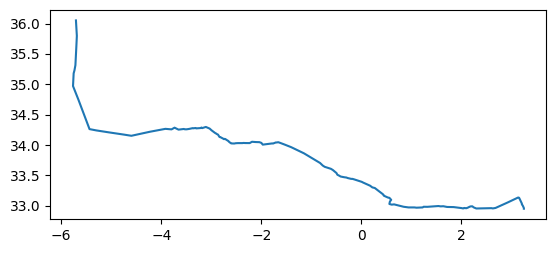

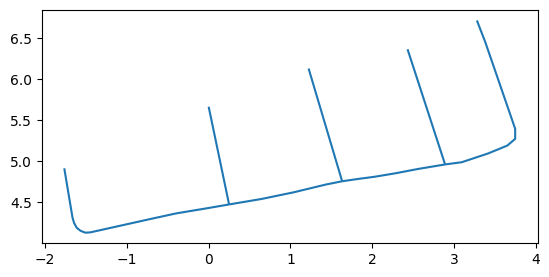

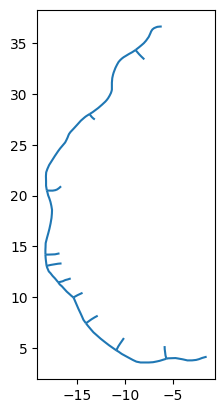

In [3]:
for i in range(4):
    gdf_filtered.iloc[[i], :].plot()

In [4]:
print("Original CRS:", gdf_filtered.crs)

Original CRS: EPSG:4326


In [5]:
gdf_filtered_32630 = gdf_filtered.to_crs(epsg=32630)
print("New CRS:", gdf_filtered_32630.crs)

New CRS: EPSG:32630


In [6]:
output_path = "Pipeline path to transport to Europe_EPSG32630.shp"
gdf_filtered_32630.to_file(output_path)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20136\1040755961.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_filtered_32630.to_file(output_path)
C:\Users\LENOVO\miniforge3\envs\master_thesis\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'LegendLabel' to 'LegendLabe'
  ogr_write(


<Axes: >

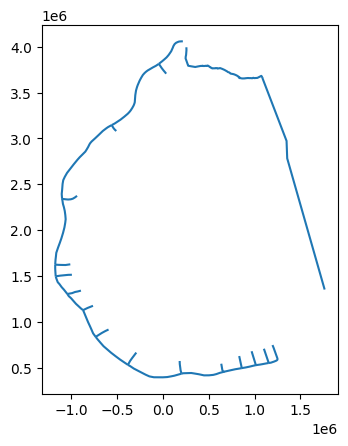

In [7]:
gdf_filtered_32630.plot()

In [8]:
import geopandas as gpd
from shapely.geometry import LineString, MultiLineString

# Function to segment a LineString into all consecutive point pairs
def segment_linestring(line):
    coords = list(line.coords)
    segments = []
    for i in range(len(coords) - 1):
        seg = LineString([coords[i], coords[i + 1]])
        segments.append(seg)
    return segments

# Handling both LineString and MultiLineString
def extract_all_segments(geom):
    segments = []
    if geom.geom_type == 'LineString':
        segments.extend(segment_linestring(geom))
    elif geom.geom_type == 'MultiLineString':
        for part in geom.geoms:
            segments.extend(segment_linestring(part))
    return segments

all_segments = []

for idx, row in gdf_filtered_32630.iterrows():
    segments = extract_all_segments(row.geometry)
    for seg in segments:
        all_segments.append({
            "original_length": seg.length,
            "geometry": LineString([seg.coords[0], seg.coords[1]]),
            "source_id": idx  
        })

seg_gdf = gpd.GeoDataFrame(all_segments, geometry="geometry", crs=gdf.crs)
seg_gdf

original_length                                           geometry  \
0        2537.661190  LINESTRING (1084566.79757 3661035.59403, 10847...   
1        1314.692766  LINESTRING (1084732.80785 3663567.81932, 10842...   
2        4534.943281  LINESTRING (1084279.26674 3664801.80373, 10820...   
3        2520.309225  LINESTRING (1082080.11137 3668767.8378, 108044...   
4        1446.289061  LINESTRING (1080446.76463 3670687.24839, 10803...   
..               ...                                                ...   
352     51180.903474  LINESTRING (-320818.26912 624230.63698, -28992...   
353     37577.903461  LINESTRING (203665.48424 435107.88289, 193200....   
354     34837.883223  LINESTRING (193200.87734 471199.30613, 188794....   
355     33336.595055  LINESTRING (188794.65587 505757.42123, 184395....   
356     34546.650314  LINESTRING (184395.00438 538802.41536, 183034....   

     source_id  
0          238  
1          238  
2          238  
3          238  
4          238  
..         ...  
352        247  
353        247  
354        247  
355        247  
356        247  

[357 rows x 3 columns]

In [9]:
from shapely.geometry import Point

seg_gdf['start'] = seg_gdf['geometry'].apply(lambda geom: Point(geom.coords[0]))
seg_gdf['end'] = seg_gdf['geometry'].apply(lambda geom: Point(geom.coords[-1]))
seg_gdf

original_length                                           geometry  \
0        2537.661190  LINESTRING (1084566.79757 3661035.59403, 10847...   
1        1314.692766  LINESTRING (1084732.80785 3663567.81932, 10842...   
2        4534.943281  LINESTRING (1084279.26674 3664801.80373, 10820...   
3        2520.309225  LINESTRING (1082080.11137 3668767.8378, 108044...   
4        1446.289061  LINESTRING (1080446.76463 3670687.24839, 10803...   
..               ...                                                ...   
352     51180.903474  LINESTRING (-320818.26912 624230.63698, -28992...   
353     37577.903461  LINESTRING (203665.48424 435107.88289, 193200....   
354     34837.883223  LINESTRING (193200.87734 471199.30613, 188794....   
355     33336.595055  LINESTRING (188794.65587 505757.42123, 184395....   
356     34546.650314  LINESTRING (184395.00438 538802.41536, 183034....   

     source_id                                start  \
0          238  POINT (1084566.79757 3661035.59403)   
1          238  POINT (1084732.80785 3663567.81932)   
2          238  POINT (1084279.26674 3664801.80373)   
3          238   POINT (1082080.11137 3668767.8378)   
4          238  POINT (1080446.76463 3670687.24839)   
..         ...                                  ...   
352        247   POINT (-320818.26912 624230.63698)   
353        247    POINT (203665.48424 435107.88289)   
354        247    POINT (193200.87734 471199.30613)   
355        247    POINT (188794.65587 505757.42123)   
356        247    POINT (184395.00438 538802.41536)   

                                     end  
0    POINT (1084732.80785 3663567.81932)  
1    POINT (1084279.26674 3664801.80373)  
2     POINT (1082080.11137 3668767.8378)  
3    POINT (1080446.76463 3670687.24839)  
4    POINT (1080361.13916 3672131.00056)  
..                                   ...  
352   POINT (-289928.83515 665039.06441)  
353    POINT (193200.87734 471199.30613)  
354    POINT (188794.65587 505757.42123)  
355    POINT (184395.00438 538802.41536)  
356    POINT (183034.96702 573322.28422)  

[357 rows x 5 columns]

In [10]:
all_nodes = set(seg_gdf["start"]) | set(seg_gdf["end"])
len(all_nodes)

360

In [11]:
node_mapping = {}
node_positions = {}
node_list = list(all_nodes)
for i, node in enumerate(node_list):
    node_position = (node.coords[0][0], node.coords[0][1])
    node_mapping[node_position] = i
    node_positions[i] = node_position

In [12]:
seg_gdf['edge'] = seg_gdf['geometry'].apply(lambda geom: (node_mapping[geom.coords[0]], node_mapping[geom.coords[-1]]))
seg_gdf

original_length                                           geometry  \
0        2537.661190  LINESTRING (1084566.79757 3661035.59403, 10847...   
1        1314.692766  LINESTRING (1084732.80785 3663567.81932, 10842...   
2        4534.943281  LINESTRING (1084279.26674 3664801.80373, 10820...   
3        2520.309225  LINESTRING (1082080.11137 3668767.8378, 108044...   
4        1446.289061  LINESTRING (1080446.76463 3670687.24839, 10803...   
..               ...                                                ...   
352     51180.903474  LINESTRING (-320818.26912 624230.63698, -28992...   
353     37577.903461  LINESTRING (203665.48424 435107.88289, 193200....   
354     34837.883223  LINESTRING (193200.87734 471199.30613, 188794....   
355     33336.595055  LINESTRING (188794.65587 505757.42123, 184395....   
356     34546.650314  LINESTRING (184395.00438 538802.41536, 183034....   

     source_id                                start  \
0          238  POINT (1084566.79757 3661035.59403)   
1          238  POINT (1084732.80785 3663567.81932)   
2          238  POINT (1084279.26674 3664801.80373)   
3          238   POINT (1082080.11137 3668767.8378)   
4          238  POINT (1080446.76463 3670687.24839)   
..         ...                                  ...   
352        247   POINT (-320818.26912 624230.63698)   
353        247    POINT (203665.48424 435107.88289)   
354        247    POINT (193200.87734 471199.30613)   
355        247    POINT (188794.65587 505757.42123)   
356        247    POINT (184395.00438 538802.41536)   

                                     end        edge  
0    POINT (1084732.80785 3663567.81932)  (204, 333)  
1    POINT (1084279.26674 3664801.80373)  (333, 334)  
2     POINT (1082080.11137 3668767.8378)   (334, 61)  
3    POINT (1080446.76463 3670687.24839)    (61, 65)  
4    POINT (1080361.13916 3672131.00056)    (65, 31)  
..                                   ...         ...  
352   POINT (-289928.83515 665039.06441)  (100, 216)  
353    POINT (193200.87734 471199.30613)  (209, 192)  
354    POINT (188794.65587 505757.42123)  (192, 252)  
355    POINT (184395.00438 538802.41536)  (252, 195)  
356    POINT (183034.96702 573322.28422)  (195, 259)  

[357 rows x 6 columns]

In [13]:
seg_gdf['edge'] = seg_gdf['geometry'].apply(lambda geom: (node_mapping[geom.coords[0]], node_mapping[geom.coords[-1]]))
seg_gdf

original_length                                           geometry  \
0        2537.661190  LINESTRING (1084566.79757 3661035.59403, 10847...   
1        1314.692766  LINESTRING (1084732.80785 3663567.81932, 10842...   
2        4534.943281  LINESTRING (1084279.26674 3664801.80373, 10820...   
3        2520.309225  LINESTRING (1082080.11137 3668767.8378, 108044...   
4        1446.289061  LINESTRING (1080446.76463 3670687.24839, 10803...   
..               ...                                                ...   
352     51180.903474  LINESTRING (-320818.26912 624230.63698, -28992...   
353     37577.903461  LINESTRING (203665.48424 435107.88289, 193200....   
354     34837.883223  LINESTRING (193200.87734 471199.30613, 188794....   
355     33336.595055  LINESTRING (188794.65587 505757.42123, 184395....   
356     34546.650314  LINESTRING (184395.00438 538802.41536, 183034....   

     source_id                                start  \
0          238  POINT (1084566.79757 3661035.59403)   
1          238  POINT (1084732.80785 3663567.81932)   
2          238  POINT (1084279.26674 3664801.80373)   
3          238   POINT (1082080.11137 3668767.8378)   
4          238  POINT (1080446.76463 3670687.24839)   
..         ...                                  ...   
352        247   POINT (-320818.26912 624230.63698)   
353        247    POINT (203665.48424 435107.88289)   
354        247    POINT (193200.87734 471199.30613)   
355        247    POINT (188794.65587 505757.42123)   
356        247    POINT (184395.00438 538802.41536)   

                                     end        edge  
0    POINT (1084732.80785 3663567.81932)  (204, 333)  
1    POINT (1084279.26674 3664801.80373)  (333, 334)  
2     POINT (1082080.11137 3668767.8378)   (334, 61)  
3    POINT (1080446.76463 3670687.24839)    (61, 65)  
4    POINT (1080361.13916 3672131.00056)    (65, 31)  
..                                   ...         ...  
352   POINT (-289928.83515 665039.06441)  (100, 216)  
353    POINT (193200.87734 471199.30613)  (209, 192)  
354    POINT (188794.65587 505757.42123)  (192, 252)  
355    POINT (184395.00438 538802.41536)  (252, 195)  
356    POINT (183034.96702 573322.28422)  (195, 259)  

[357 rows x 6 columns]

In [14]:
output_path = "seg_gdf1.shp"
seg_gdf.to_parquet(output_path)

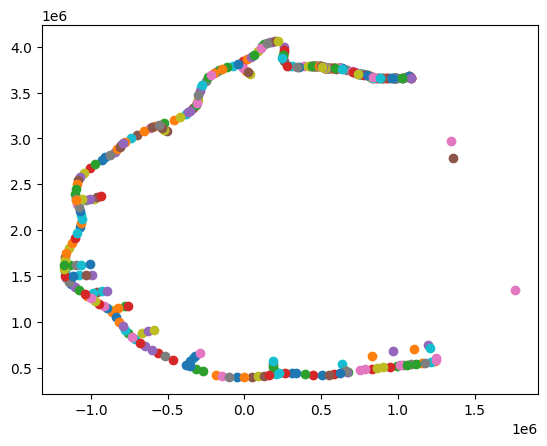

In [15]:
for n in list(all_nodes):
    plt.scatter(n.coords[0][0], n.coords[0][1])

<Axes: >

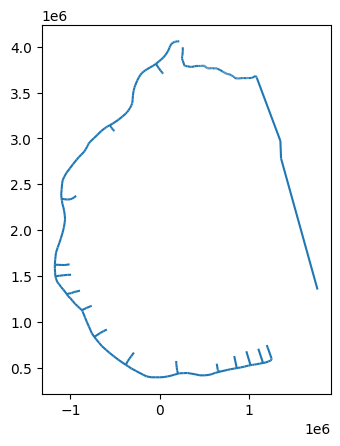

In [16]:
seg_gdf.plot()

Original graph nodes: 360
Simplified edges count: 31


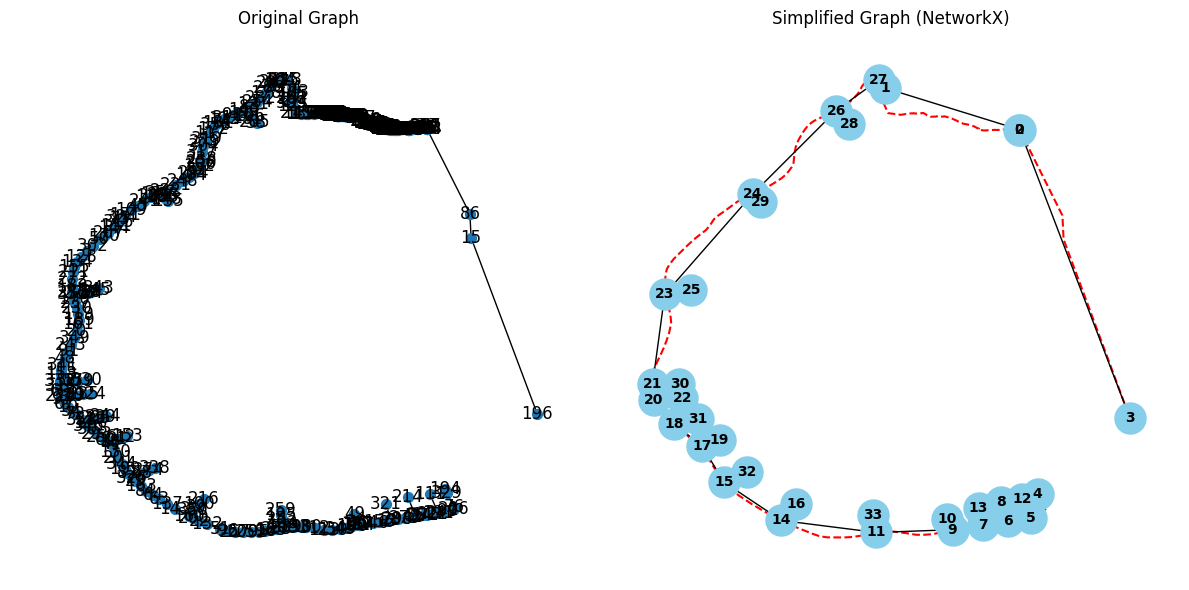

In [17]:
import networkx as nx
from shapely.geometry import LineString, Point
import matplotlib.pyplot as plt

G = nx.Graph()
edges = seg_gdf["edge"]
positions = node_positions
node_points = {node_id: Point(coords) for node_id, coords in positions.items()}

for u_id, v_id in edges:
    point_u = node_points[u_id]
    point_v = node_points[v_id]
    geom = LineString([point_u, point_v])
    length = geom.length
    G.add_edge(point_u, point_v, geometry=geom, length=length)
simplified_edges_data = [] 
visited = set()

for node in G.nodes():
    if G.degree[node] != 2 and node not in visited:
        for neighbor in G.neighbors(node):
            path = [node, neighbor]
            current = neighbor
            prev = node

            while G.degree[current] == 2:
                next_nodes = [n for n in G.neighbors(current) if n != prev]
                if not next_nodes:
                    break
                prev, current = current, next_nodes[0]
                path.append(current)

            # Marking all nodes in the path as visited
            for p in path:
                visited.add(p)

            # Creating simplified geometry and length
            edges_in_path = list(zip(path[:-1], path[1:]))
            all_coords = [path[0].coords[0]]
            total_length = 0

            for u, v in edges_in_path:
                data = G.get_edge_data(u, v)
                seg = data["geometry"]
                total_length += data["length"] 
                coords = list(seg.coords)
                if coords[0] == all_coords[-1]:
                    all_coords.extend(coords[1:])
                else:
                    all_coords.extend(coords[::-1][1:])

            simplified_geom = LineString(all_coords) 

            simplified_edges_data.append({
                "u": path[0], # The start node of the simplified edge
                "v": path[-1], # The end node of the simplified edge
                "geometry": simplified_geom,
                "length": total_length
            })

print("Original graph nodes:", len(G.nodes))
print("Simplified edges count:", len(simplified_edges_data)) # Use the correct variable name

# Plotting original graph
plt.figure(figsize=(12, 6)) 
plt.subplot(1, 2, 1)

draw_positions_original = {node: (node.x, node.y) for node in G.nodes()}
nx.draw(G, pos=draw_positions_original, with_labels=False, node_size=50)
labels_original = {node_points[k]: k for k in positions.keys()}
nx.draw_networkx_labels(G, pos=draw_positions_original, labels=labels_original)
plt.title("Original Graph")

plt.subplot(1, 2, 2)
simplified_G = nx.Graph()
simplified_pos = {} 

# Adding nodes and edges to the simplified graph
node_counter = 0 
node_point_to_label = {} 

for edge_data in simplified_edges_data:
    u = edge_data["u"]
    v = edge_data["v"]

    # Adding u and v to simplified_G if they haven't been added yet
    if u not in node_point_to_label:
        node_point_to_label[u] = node_counter
        simplified_pos[node_point_to_label[u]] = (u.x, u.y)
        node_counter += 1
    if v not in node_point_to_label:
        node_point_to_label[v] = node_counter
        simplified_pos[node_point_to_label[v]] = (v.x, v.y)
        node_counter += 1

    # Adding the edge to the simplified graph using the integer labels
    simplified_G.add_edge(node_point_to_label[u], node_point_to_label[v],
                          geometry=edge_data["geometry"],
                          length=edge_data["length"])

nx.draw(simplified_G, pos=simplified_pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold')
for u, v, data in simplified_G.edges(data=True):
    geom = data['geometry']
    x, y = geom.xy
    plt.plot(x, y, 'r--', zorder=0) 

plt.title("Simplified Graph (NetworkX)")
plt.tight_layout()
plt.show()

In [18]:
simplified_pos

{0: (1084566.797570421, 3661035.5940326783),
 1: (256277.51498073206, 3994867.6282262886),
 2: (1084896.0871844594, 3661594.195242236),
 3: (1764330.7311590156, 1352444.997016207),
 4: (1195611.6925466913, 746975.6532268095),
 5: (1154425.0778447003, 551549.3021472568),
 6: (1014363.6529308609, 527711.0111853388),
 7: (860730.3475719391, 495586.92541880923),
 8: (967635.5212025206, 679633.2723551434),
 9: (672159.4131516954, 457313.6206965102),
 10: (636747.9378640703, 543578.9634272254),
 11: (203665.48424219014, 435107.8828937918),
 12: (1101776.1861117822, 706908.2534138398),
 13: (832354.3256916614, 627217.1728725997),
 14: (-381306.048346138, 531223.9314056674),
 15: (-733175.458558931, 836438.6183837976),
 16: (-289928.8351471592, 665039.0644097957),
 17: (-870795.4622877853, 1127956.684965779),
 18: (-1041994.6155149229, 1304064.361494688),
 19: (-762343.7688614035, 1175376.226315723),
 20: (-1169012.4359330144, 1496577.3756112412),
 21: (-1174513.6574186347, 1624347.1528375226)

In [19]:
from pyproj import Transformer

transformer = Transformer.from_crs("EPSG:32630", "EPSG:4326", always_xy=True)

simplified_pos_4326 = {
    key: transformer.transform(point[0], point[1]) 
    for key, point in simplified_pos.items()
}

simplified_pos_4326

{0: (3.247744999999999, 32.931267000000005),
 1: (-5.706203, 36.067881),
 2: (3.2516000000000034, 32.9361),
 3: (8.541633999999995, 11.992434999999999),
 4: (3.2818489999999994, 6.717337),
 5: (2.8928130000000007, 4.963501000000001),
 6: (1.6333159999999975, 4.758621999999999),
 7: (0.2499109999999999, 4.476409),
 8: (1.222778, 6.131944),
 9: (-1.4490230000000002, 4.135866999999999),
 10: (-1.7666669999999998, 4.916667000000001),
 11: (-5.668363, 3.9322119999999994),
 12: (2.4333329999999984, 6.366666999999998),
 13: (3.975693351829396e-16, 5.666666999999999),
 14: (-10.922122, 4.760074000000002),
 15: (-14.107042999999999, 7.426002999999996),
 16: (-10.119235, 5.970237999999998),
 17: (-15.413677, 9.968640999999995),
 18: (-17.006138, 11.45307),
 19: (-14.460923000000003, 10.424096999999998),
 20: (-18.231106999999998, 13.075629),
 21: (-18.353604, 14.186710999999999),
 22: (-16.662688999999997, 13.316926000000002),
 23: (-18.203885999999997, 20.497042),
 24: (-13.725941000000002, 28.

In [28]:
pip install folium


   ---------------------------------------- 0/3 [xyzservices]
   ------------- -------------------------- 1/3 [branca]
   ------------- -------------------------- 1/3 [branca]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   ---------------------------------------- 3/3 [folium]

Note: you may need to restart the kernel to use updated packages.


In [20]:
import folium

def plot_points_with_labels(points_dict):
    """
    Plot all points from a dictionary on a folium map with labels.
    
    Args:
        points_dict: Dictionary where keys are labels and values are (lon, lat) tuples
    """
    # Calculate center of all points for initial view
    lats = [point[1] for point in points_dict.values()]
    lons = [point[0] for point in points_dict.values()]
    center_lat = sum(lats) / len(lats)
    center_lon = sum(lons) / len(lons)
    
    m = folium.Map(location=[center_lat, center_lon], zoom_start=12)
    
    for label, (lon, lat) in points_dict.items():
        folium.Marker(
            location=[lat, lon],
            popup=f"Point {label}",
            tooltip=f"Point {label}",
            icon=folium.DivIcon(html=f'<div style="font-size: 12pt">{label}</div>')
        ).add_to(m)
    
    return m
map = plot_points_with_labels(simplified_pos_4326)
map

In [21]:
import geopandas as gpd
from shapely.geometry import LineString

simplified_gdf = gpd.GeoDataFrame(
    data=[{
        'u': str(edge['u']), 
        'v': str(edge['v']),  
        'length': edge['length'],
        'geometry': edge['geometry']
    } for edge in simplified_edges_data],
    geometry='geometry',
    crs="EPSG:32630"  # Use the same CRS as the original data
)

simplified_gdf['start'] = simplified_gdf['geometry'].apply(lambda geom: Point(geom.coords[0]))
simplified_gdf['end'] = simplified_gdf['geometry'].apply(lambda geom: Point(geom.coords[-1]))

# Saving as shapefile
simplified_gdf.to_parquet('simplified_network.shp')

print(f"Simplified network has {len(simplified_gdf)} edges")
simplified_gdf

Simplified network has 31 edges


u  \
0     POINT (1084566.797570421 3661035.5940326783)   
1     POINT (1084896.0871844594 3661594.195242236)   
2     POINT (1195611.6925466913 746975.6532268095)   
3     POINT (1014363.6529308609 527711.0111853388)   
4     POINT (1014363.6529308609 527711.0111853388)   
5     POINT (1014363.6529308609 527711.0111853388)   
6      POINT (672159.4131516954 457313.6206965102)   
7      POINT (672159.4131516954 457313.6206965102)   
8      POINT (672159.4131516954 457313.6206965102)   
9     POINT (1101776.1861117822 706908.2534138398)   
10     POINT (832354.3256916614 627217.1728725997)   
11     POINT (-381306.048346138 531223.9314056674)   
12     POINT (-381306.048346138 531223.9314056674)   
13     POINT (-381306.048346138 531223.9314056674)   
14    POINT (-870795.4622877853 1127956.684965779)   
15    POINT (-870795.4622877853 1127956.684965779)   
16    POINT (-870795.4622877853 1127956.684965779)   
17  POINT (-1169012.4359330144 1496577.3756112412)   
18  POINT (-1169012.4359330144 1496577.3756112412)   
19  POINT (-1169012.4359330144 1496577.3756112412)   
20    POINT (-1099621.6766596707 2342045.56281154)   
21    POINT (-1099621.6766596707 2342045.56281154)   
22    POINT (-1099621.6766596707 2342045.56281154)   
23   POINT (-43813.753459640546 3814350.148469792)   
24   POINT (-43813.753459640546 3814350.148469792)   
25   POINT (-43813.753459640546 3814350.148469792)   
26   POINT (-507925.1438437173 3082015.1536426875)   
27  POINT (-1009603.6958615482 1627657.7010490778)   
28   POINT (-893821.2708214209 1340906.5394216673)   
29    POINT (-592530.0581047086 916571.1086158544)   
30    POINT (183034.96702043538 573322.2842210291)   

                                                 v        length  \
0    POINT (256277.51498073206 3994867.6282262886)  1.096428e+06   
1     POINT (1764330.7311590156 1352444.997016207)  2.415326e+06   
2     POINT (1154425.0778447003 551549.3021472568)  2.726311e+05   
3     POINT (1154425.0778447003 551549.3021472568)  1.421014e+05   
4     POINT (860730.3475719391 495586.92541880923)  1.570128e+05   
5      POINT (967635.5212025206 679633.2723551434)  1.589462e+05   
6     POINT (860730.3475719391 495586.92541880923)  1.924690e+05   
7      POINT (636747.9378640703 543578.9634272254)  1.025225e+05   
8     POINT (203665.48424219014 435107.8828937918)  4.768562e+05   
9     POINT (1154425.0778447003 551549.3021472568)  1.640375e+05   
10    POINT (860730.3475719391 495586.92541880923)  1.346541e+05   
11    POINT (203665.48424219014 435107.8828937918)  6.224838e+05   
12     POINT (-733175.458558931 836438.6183837976)  4.684522e+05   
13    POINT (-289928.8351471592 665039.0644097957)  1.623444e+05   
14     POINT (-733175.458558931 836438.6183837976)  3.233737e+05   
15   POINT (-1041994.6155149229 1304064.361494688)  2.465939e+05   
16    POINT (-762343.7688614035 1175376.226315723)  1.184315e+05   
17   POINT (-1041994.6155149229 1304064.361494688)  2.337212e+05   
18  POINT (-1174513.6574186347 1624347.1528375226)  1.279441e+05   
19   POINT (-992464.9793229871 1513752.5712228173)  1.775677e+05   
20  POINT (-1174513.6574186347 1624347.1528375226)  7.373718e+05   
21    POINT (-557855.7685727642 3146469.910858791)  1.015576e+06   
22   POINT (-936121.9927587386 2374502.8879548986)  1.745615e+05   
23    POINT (-557855.7685727642 3146469.910858791)  8.920981e+05   
24   POINT (217635.46414453507 4060006.5087111345)  3.782438e+05   
25    POINT (35874.37787406426 3706971.4409062243)  1.338507e+05   
26    POINT (-557855.7685727642 3146469.910858791)  8.228139e+04   
27  POINT (-1174513.6574186347 1624347.1528375226)  1.655578e+05   
28   POINT (-1041994.6155149229 1304064.361494688)  1.531067e+05   
29     POINT (-733175.458558931 836438.6183837976)  1.620742e+05   
30    POINT (203665.48424219014 435107.8828937918)  1.402990e+05   

                                             geometry  \
0   LINESTRING (1084566.798 3661035.594, 1084732.8...   
1   LINESTRING (1084896.087 3

In [22]:
for col in ["start", "end"]:
    tmp_gdf = simplified_gdf.set_geometry(col, crs="EPSG:32630")
    simplified_gdf[col] = tmp_gdf.to_crs("EPSG:4326")[col]

simplified_gdf

u  \
0     POINT (1084566.797570421 3661035.5940326783)   
1     POINT (1084896.0871844594 3661594.195242236)   
2     POINT (1195611.6925466913 746975.6532268095)   
3     POINT (1014363.6529308609 527711.0111853388)   
4     POINT (1014363.6529308609 527711.0111853388)   
5     POINT (1014363.6529308609 527711.0111853388)   
6      POINT (672159.4131516954 457313.6206965102)   
7      POINT (672159.4131516954 457313.6206965102)   
8      POINT (672159.4131516954 457313.6206965102)   
9     POINT (1101776.1861117822 706908.2534138398)   
10     POINT (832354.3256916614 627217.1728725997)   
11     POINT (-381306.048346138 531223.9314056674)   
12     POINT (-381306.048346138 531223.9314056674)   
13     POINT (-381306.048346138 531223.9314056674)   
14    POINT (-870795.4622877853 1127956.684965779)   
15    POINT (-870795.4622877853 1127956.684965779)   
16    POINT (-870795.4622877853 1127956.684965779)   
17  POINT (-1169012.4359330144 1496577.3756112412)   
18  POINT (-1169012.4359330144 1496577.3756112412)   
19  POINT (-1169012.4359330144 1496577.3756112412)   
20    POINT (-1099621.6766596707 2342045.56281154)   
21    POINT (-1099621.6766596707 2342045.56281154)   
22    POINT (-1099621.6766596707 2342045.56281154)   
23   POINT (-43813.753459640546 3814350.148469792)   
24   POINT (-43813.753459640546 3814350.148469792)   
25   POINT (-43813.753459640546 3814350.148469792)   
26   POINT (-507925.1438437173 3082015.1536426875)   
27  POINT (-1009603.6958615482 1627657.7010490778)   
28   POINT (-893821.2708214209 1340906.5394216673)   
29    POINT (-592530.0581047086 916571.1086158544)   
30    POINT (183034.96702043538 573322.2842210291)   

                                                 v        length  \
0    POINT (256277.51498073206 3994867.6282262886)  1.096428e+06   
1     POINT (1764330.7311590156 1352444.997016207)  2.415326e+06   
2     POINT (1154425.0778447003 551549.3021472568)  2.726311e+05   
3     POINT (1154425.0778447003 551549.3021472568)  1.421014e+05   
4     POINT (860730.3475719391 495586.92541880923)  1.570128e+05   
5      POINT (967635.5212025206 679633.2723551434)  1.589462e+05   
6     POINT (860730.3475719391 495586.92541880923)  1.924690e+05   
7      POINT (636747.9378640703 543578.9634272254)  1.025225e+05   
8     POINT (203665.48424219014 435107.8828937918)  4.768562e+05   
9     POINT (1154425.0778447003 551549.3021472568)  1.640375e+05   
10    POINT (860730.3475719391 495586.92541880923)  1.346541e+05   
11    POINT (203665.48424219014 435107.8828937918)  6.224838e+05   
12     POINT (-733175.458558931 836438.6183837976)  4.684522e+05   
13    POINT (-289928.8351471592 665039.0644097957)  1.623444e+05   
14     POINT (-733175.458558931 836438.6183837976)  3.233737e+05   
15   POINT (-1041994.6155149229 1304064.361494688)  2.465939e+05   
16    POINT (-762343.7688614035 1175376.226315723)  1.184315e+05   
17   POINT (-1041994.6155149229 1304064.361494688)  2.337212e+05   
18  POINT (-1174513.6574186347 1624347.1528375226)  1.279441e+05   
19   POINT (-992464.9793229871 1513752.5712228173)  1.775677e+05   
20  POINT (-1174513.6574186347 1624347.1528375226)  7.373718e+05   
21    POINT (-557855.7685727642 3146469.910858791)  1.015576e+06   
22   POINT (-936121.9927587386 2374502.8879548986)  1.745615e+05   
23    POINT (-557855.7685727642 3146469.910858791)  8.920981e+05   
24   POINT (217635.46414453507 4060006.5087111345)  3.782438e+05   
25    POINT (35874.37787406426 3706971.4409062243)  1.338507e+05   
26    POINT (-557855.7685727642 3146469.910858791)  8.228139e+04   
27  POINT (-1174513.6574186347 1624347.1528375226)  1.655578e+05   
28   POINT (-1041994.6155149229 1304064.361494688)  1.531067e+05   
29     POINT (-733175.458558931 836438.6183837976)  1.620742e+05   
30    POINT (203665.48424219014 435107.8828937918)  1.402990e+05   

                                             geometry  \
0   LINESTRING (1084566.798 3661035.594, 1084732.8...   
1   LINESTRING (1084896.087 3

In [23]:
len(set(simplified_gdf["u"].unique()) | set(simplified_gdf["v"].unique()))

34

In [24]:
list_all_nodes = list(set(simplified_gdf["start"].unique()) | set(simplified_gdf["end"].unique()))
nodes = {node: node_index+1 for node_index, node in enumerate(list_all_nodes)}
nodes

{<POINT (-16.877 14.308)>: 1,
 <POINT (-16.711 20.911)>: 2,
 <POINT (-5.706 36.068)>: 3,
 <POINT (2.433 6.367)>: 4,
 <POINT (3.248 32.931)>: 5,
 <POINT (-5.668 3.932)>: 6,
 <POINT (-18.354 14.187)>: 7,
 <POINT (1.633 4.759)>: 8,
 <POINT (2.893 4.964)>: 9,
 <POINT (-12.871 8.17)>: 10,
 <POINT (-14.461 10.424)>: 11,
 <POINT (-13.172 27.488)>: 12,
 <POINT (-18.231 13.076)>: 13,
 <POINT (-10.922 4.76)>: 14,
 <POINT (-5.859 5.18)>: 15,
 <POINT (8.542 11.992)>: 16,
 <POINT (3.282 6.717)>: 17,
 <POINT (3.252 32.936)>: 18,
 <POINT (-15.414 9.969)>: 19,
 <POINT (-13.726 28.022)>: 20,
 <POINT (-7.989 33.402)>: 21,
 <POINT (1.223 6.132)>: 22,
 <POINT (-10.119 5.97)>: 23,
 <POINT (0.25 4.476)>: 24,
 <POINT (3.976e-16 5.667)>: 25,
 <POINT (-1.767 4.917)>: 26,
 <POINT (-14.107 7.426)>: 27,
 <POINT (-17.006 11.453)>: 28,
 <POINT (-15.7 11.84)>: 29,
 <POINT (-6.158 36.644)>: 30,
 <POINT (-1.449 4.136)>: 31,
 <POINT (-16.663 13.317)>: 32,
 <POINT (-18.204 20.497)>: 33,
 <POINT (-8.908 34.328)>: 34}

In [25]:
converted_gdf = simplified_gdf.copy()
converted_gdf["inlet_index"] = converted_gdf["start"].apply(lambda x: nodes[x])
converted_gdf["outlet_index"] = converted_gdf["end"].apply(lambda x: nodes[x])
converted_gdf["calculated_length"] = converted_gdf["geometry"].length
converted_gdf

u  \
0     POINT (1084566.797570421 3661035.5940326783)   
1     POINT (1084896.0871844594 3661594.195242236)   
2     POINT (1195611.6925466913 746975.6532268095)   
3     POINT (1014363.6529308609 527711.0111853388)   
4     POINT (1014363.6529308609 527711.0111853388)   
5     POINT (1014363.6529308609 527711.0111853388)   
6      POINT (672159.4131516954 457313.6206965102)   
7      POINT (672159.4131516954 457313.6206965102)   
8      POINT (672159.4131516954 457313.6206965102)   
9     POINT (1101776.1861117822 706908.2534138398)   
10     POINT (832354.3256916614 627217.1728725997)   
11     POINT (-381306.048346138 531223.9314056674)   
12     POINT (-381306.048346138 531223.9314056674)   
13     POINT (-381306.048346138 531223.9314056674)   
14    POINT (-870795.4622877853 1127956.684965779)   
15    POINT (-870795.4622877853 1127956.684965779)   
16    POINT (-870795.4622877853 1127956.684965779)   
17  POINT (-1169012.4359330144 1496577.3756112412)   
18  POINT (-1169012.4359330144 1496577.3756112412)   
19  POINT (-1169012.4359330144 1496577.3756112412)   
20    POINT (-1099621.6766596707 2342045.56281154)   
21    POINT (-1099621.6766596707 2342045.56281154)   
22    POINT (-1099621.6766596707 2342045.56281154)   
23   POINT (-43813.753459640546 3814350.148469792)   
24   POINT (-43813.753459640546 3814350.148469792)   
25   POINT (-43813.753459640546 3814350.148469792)   
26   POINT (-507925.1438437173 3082015.1536426875)   
27  POINT (-1009603.6958615482 1627657.7010490778)   
28   POINT (-893821.2708214209 1340906.5394216673)   
29    POINT (-592530.0581047086 916571.1086158544)   
30    POINT (183034.96702043538 573322.2842210291)   

                                                 v        length  \
0    POINT (256277.51498073206 3994867.6282262886)  1.096428e+06   
1     POINT (1764330.7311590156 1352444.997016207)  2.415326e+06   
2     POINT (1154425.0778447003 551549.3021472568)  2.726311e+05   
3     POINT (1154425.0778447003 551549.3021472568)  1.421014e+05   
4     POINT (860730.3475719391 495586.92541880923)  1.570128e+05   
5      POINT (967635.5212025206 679633.2723551434)  1.589462e+05   
6     POINT (860730.3475719391 495586.92541880923)  1.924690e+05   
7      POINT (636747.9378640703 543578.9634272254)  1.025225e+05   
8     POINT (203665.48424219014 435107.8828937918)  4.768562e+05   
9     POINT (1154425.0778447003 551549.3021472568)  1.640375e+05   
10    POINT (860730.3475719391 495586.92541880923)  1.346541e+05   
11    POINT (203665.48424219014 435107.8828937918)  6.224838e+05   
12     POINT (-733175.458558931 836438.6183837976)  4.684522e+05   
13    POINT (-289928.8351471592 665039.0644097957)  1.623444e+05   
14     POINT (-733175.458558931 836438.6183837976)  3.233737e+05   
15   POINT (-1041994.6155149229 1304064.361494688)  2.465939e+05   
16    POINT (-762343.7688614035 1175376.226315723)  1.184315e+05   
17   POINT (-1041994.6155149229 1304064.361494688)  2.337212e+05   
18  POINT (-1174513.6574186347 1624347.1528375226)  1.279441e+05   
19   POINT (-992464.9793229871 1513752.5712228173)  1.775677e+05   
20  POINT (-1174513.6574186347 1624347.1528375226)  7.373718e+05   
21    POINT (-557855.7685727642 3146469.910858791)  1.015576e+06   
22   POINT (-936121.9927587386 2374502.8879548986)  1.745615e+05   
23    POINT (-557855.7685727642 3146469.910858791)  8.920981e+05   
24   POINT (217635.46414453507 4060006.5087111345)  3.782438e+05   
25    POINT (35874.37787406426 3706971.4409062243)  1.338507e+05   
26    POINT (-557855.7685727642 3146469.910858791)  8.228139e+04   
27  POINT (-1174513.6574186347 1624347.1528375226)  1.655578e+05   
28   POINT (-1041994.6155149229 1304064.361494688)  1.531067e+05   
29     POINT (-733175.458558931 836438.6183837976)  1.620742e+05   
30    POINT (203665.48424219014 435107.8828937918)  1.402990e+05   

                                             geometry  \
0   LINESTRING (1084566.798 3661035.594, 1084732.8...   
1   LINESTRING (1084896.087 3

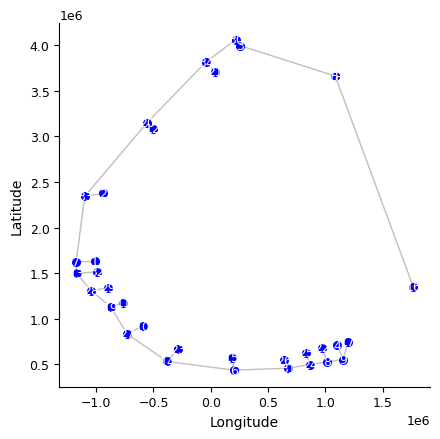

In [36]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

def plot_network_with_connections(gdf):
    """
    Plot nodes with indices and draw connecting lines based on inlet/outlet relationships
    
    Args:
        gdf: GeoDataFrame containing 'start', 'end', 'inlet_index', 'outlet_index' columns
    """
    nodes = {}
    connections = []
    
    for _, row in gdf.iterrows():
        start_point = row['geometry'].coords[0]
        start_index = row['inlet_index']
        if start_index not in nodes:
            nodes[start_index] = {'lon': start_point[0], 'lat': start_point[1]}
        
        end_point = row['geometry'].coords[-1]
        end_index = row['outlet_index']
        if end_index not in nodes:
            nodes[end_index] = {'lon': end_point[0], 'lat': end_point[1]}
        
        connections.append((start_index, end_index))
    
    plt.figure(figsize=(4.5, 4.5))
    
    for start_idx, end_idx in connections:
        start_coords = nodes[start_idx]
        end_coords = nodes[end_idx]
        line = Line2D(
            [start_coords['lon'], end_coords['lon']],
            [start_coords['lat'], end_coords['lat']],
            color='gray', alpha=0.5, linestyle='-', linewidth=1
        )
        plt.gca().add_line(line)
    
    for index, coords in nodes.items():
        plt.scatter(coords['lon'], coords['lat'], color='blue', s=30, zorder=5)
        plt.text(coords['lon'], coords['lat'], str(index), 
                 fontsize=9, ha='center', va='center', color='white', zorder=11)
    
    plt.xlabel('Longitude', fontsize=10)
    plt.ylabel('Latitude', fontsize=10)
    plt.tick_params(axis='both', labelsize=9)  
    plt.gca().xaxis.get_offset_text().set_fontsize(9)
    plt.gca().yaxis.get_offset_text().set_fontsize(9)
    all_lons = [node['lon'] for node in nodes.values()]
    all_lats = [node['lat'] for node in nodes.values()]
    lon_padding = (max(all_lons) - min(all_lons)) * 0.05
    lat_padding = (max(all_lats) - min(all_lats)) * 0.05
    plt.xlim(min(all_lons) - lon_padding, max(all_lons) + lon_padding)
    plt.ylim(min(all_lats) - lat_padding, max(all_lats) + lat_padding)
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tight_layout()
    plt.savefig("network_nodes_connections.jpeg", format='jpeg', dpi=300)
    
    plt.show()
plot_network_with_connections(converted_gdf)
